In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Softmax, Conv2D, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [2]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
#Function to print the shape of the datasets
def print_dataset_shapes(train_x, train_y, test_x, test_y):
  print("Training Dataset of Images Shape:  ", train_x.shape)
  print("Training Dataset of Labels Shape:  ", train_y.shape)
  print("Testing Dataset of Images Shape:   ", test_x.shape)
  print("Testing Dataset of Labels Shape:   ", test_y.shape)


In [4]:
# Print shape of the train and test images as well as labels
print_dataset_shapes(train_images, train_labels, test_images, test_labels)

Training Dataset of Images Shape:   (60000, 28, 28)
Training Dataset of Labels Shape:   (60000,)
Testing Dataset of Images Shape:    (10000, 28, 28)
Testing Dataset of Labels Shape:    (10000,)


In [6]:
train_images_with_channel = train_images[..., np.newaxis]
test_images_with_channel = test_images[..., np.newaxis]

In [7]:
# Function to print the unique labels in the dataset passed to it. Takes the dataset and a string as argument

def print_unique_labels(label_dataset, dataset_name):
  print('Unique Labels in {}: {}'.format(dataset_name, np.unique(label_dataset)))


In [9]:
# Let's see how many types of clothing are in the data sets and that the same labels are in both datasets
print_unique_labels(train_labels, "Training")
print_unique_labels(test_labels, "Testing")

Unique Labels in Training: [0 1 2 3 4 5 6 7 8 9]
Unique Labels in Testing: [0 1 2 3 4 5 6 7 8 9]


In [10]:
train_labels.dtype

dtype('uint8')

In [11]:
# Let's check if there is an even distribution of types of clothing

print("Count for each unique label in Training set:\n", Counter(train_labels))
print("Count for each unique in Test set label:\n", Counter(test_labels))

Count for each unique label in Training set:
 Counter({9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000})
Count for each unique in Test set label:
 Counter({9: 1000, 2: 1000, 1: 1000, 6: 1000, 4: 1000, 5: 1000, 7: 1000, 3: 1000, 8: 1000, 0: 1000})


In [12]:
# Let's create a list of discriptive labels for the clothing items

descriptive_labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

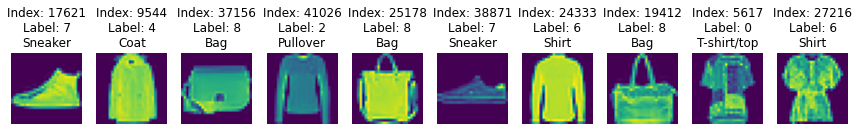

In [13]:
# Lets look at some random images and their lables from the training dataset

figure, axe = plt.subplots(ncols = 10, nrows =1, figsize=(15, 15))
for i in range(0,10):
    random_number = np.random.choice(train_images_with_channel.shape[0])
    axe[i].axis('off')
    # axe[i].imshow(train_images[random_number])
    axe[i].imshow(train_images[random_number])
    axe[i].set_title('Index: {}\nLabel: {}\n{}' .format(random_number, train_labels[random_number], descriptive_labels[train_labels[random_number]]))




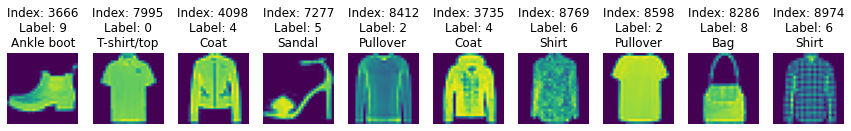

In [14]:
# Lets look at some random images and their lables from the test dataset
figure, axe = plt.subplots(ncols = 10, nrows =1, figsize=(15, 15))
for i in range(0,10):
    random_number = np.random.choice(test_images_with_channel.shape[0])
    axe[i].axis('off')
    axe[i].imshow(test_images[random_number])
    axe[i].set_title('Index: {}\nLabel: {}\n{}' .format(random_number, test_labels[random_number], descriptive_labels[test_labels[random_number]]))

In [15]:
#Define our get model function (CNN without Regularization)

def get_CNN_no_reg_model(rate, input_shape):
  model = Sequential ([
                       Conv2D (16, kernel_size = (3,3), padding = 'SAME', input_shape = input_shape, activation = 'relu', name = 'conv_1'),
                       MaxPooling2D(pool_size = (2,2), name = 'maxpool_1'),
                       BatchNormalization(),
                       Conv2D(16, kernel_size = (3,3), padding = 'SAME', activation = 'relu', name = 'conv_2'),
                       MaxPooling2D(pool_size = (2,2), name = 'maxpool_2'),
                       BatchNormalization(),
                       Conv2D(8, kernel_size = (3,3), padding = 'SAME', activation = 'relu', name = 'conv_3' ),
                       Flatten(name = 'flatten'),
                       Dense(32, activation = 'relu', name = 'dense_1'),
                       Dropout(rate),
                       Dense(32, activation = 'relu', name = 'dense_2'),
                       Dense(10, activation = 'softmax', name = 'softmax'),
                     ])
  return model


In [16]:
print_dataset_shapes(train_images, train_labels, test_images, test_labels)

Training Dataset of Images Shape:   (60000, 28, 28)
Training Dataset of Labels Shape:   (60000,)
Testing Dataset of Images Shape:    (10000, 28, 28)
Testing Dataset of Labels Shape:    (10000,)


In [17]:
print(train_images_with_channel.shape)
print(train_images_with_channel[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [18]:
# CNN_reg_model = get_CNN_reg_model(1e-5, 0.4, train_x_std[0].shape)
CNN_no_reg_model = get_CNN_no_reg_model(0.4, train_images_with_channel[0].shape)

In [19]:
CNN_no_reg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 14, 14, 16)        0         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 16)        2320      
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 7, 7, 16)          0         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 16)         64        
 hNormalization)                                        

In [20]:
CNN_no_reg_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [22]:
CNN_no_reg_history = CNN_no_reg_model.fit(x = train_images_with_channel, y = train_labels, 
                  epochs = 30,
                  validation_split = 0.15, batch_size = 64, verbose = True)

Epoch 1/30
797/797 [==============================] - 40s 50ms/step - loss: 0.2762 - accuracy: 0.8997 - val_loss: 0.3188 - val_accuracy: 0.8842
Epoch 2/30
797/797 [==============================] - 35s 44ms/step - loss: 0.2710 - accuracy: 0.8998 - val_loss: 0.2888 - val_accuracy: 0.8988
Epoch 3/30
797/797 [==============================] - 31s 39ms/step - loss: 0.2686 - accuracy: 0.9005 - val_loss: 0.2799 - val_accuracy: 0.9021
Epoch 4/30
797/797 [==============================] - 31s 38ms/step - loss: 0.2649 - accuracy: 0.9022 - val_loss: 0.2820 - val_accuracy: 0.9006
Epoch 5/30
797/797 [==============================] - 30s 38ms/step - loss: 0.2571 - accuracy: 0.9055 - val_loss: 0.2870 - val_accuracy: 0.8962
Epoch 6/30
797/797 [==============================] - 31s 39ms/step - loss: 0.2558 - accuracy: 0.9055 - val_loss: 0.2777 - val_accuracy: 0.8988
Epoch 7/30
797/797 [==============================] - 30s 38ms/step - loss: 0.2515 - accuracy: 0.9077 - val_loss: 0.2953 - val_accuracy:

In [23]:
CNN_no_reg_model.evaluate(test_images_with_channel, test_labels)

313/313 [==============================] - 2s 8ms/step - loss: 0.2934 - accuracy: 0.9028


[0.2934265732765198, 0.9028000235557556]

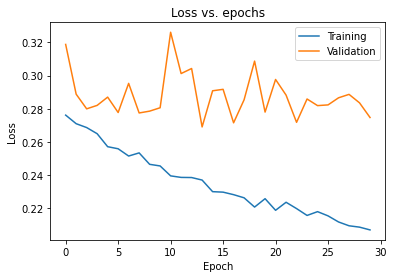

In [24]:
# Plot the training and validation loss

plt.plot(CNN_no_reg_history.history['loss'])
plt.plot(CNN_no_reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

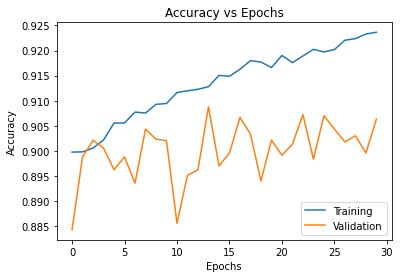

In [27]:
plt.plot(CNN_no_reg_history.history['accuracy'])
plt.plot(CNN_no_reg_history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'lower right')


In [58]:
prediction = CNN_no_reg_model.predict(test_images_with_channel[np.newaxis, 2749])
print(prediction)
prediction.shape

[[2.79559188e-11 4.04450193e-29 4.69881643e-21 6.01414951e-19
  6.31016494e-25 2.08508646e-14 3.66555837e-15 1.02902684e-16
  1.00000000e+00 3.66652726e-13]]


(1, 10)

8 Bag


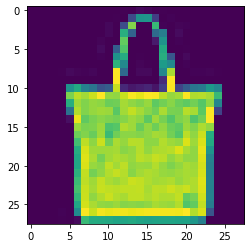

In [29]:
print(np.argmax(prediction), descriptive_labels[np.argmax(prediction)])
plt.imshow(test_images[2749])

In [60]:
# Function to print n random images from the test dataset with their actual and predicted labels and their probability distributions

def show_table_of_n_random_data_labels_and_pred_dist(model, model_type, n ):
  for i in range(0, n):
    random_index = 999
    random_index = np.random.choice(test_images.shape[0])
    prediction = model.predict(test_images_with_channel[np.newaxis, random_index])
    ht = np.reshape(prediction, (10,))
    fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10,2))
    ax1.axis('Off')
    ax1.imshow(test_images[random_index])
    ax1.set_title('Actual Label: {}\n{}' .format(test_labels[random_index], descriptive_labels[test_labels[random_index]]))     
    ax2.bar(range(0,10), height = ht)
    ax2.set_title('Prediction: {} ; Predicted Label: {}\n  Model: {}\nPrediction Distribution' .format(np.argmax(ht), descriptive_labels[np.argmax(ht)] , model_type))
    plt.show()


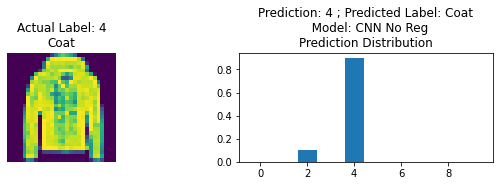

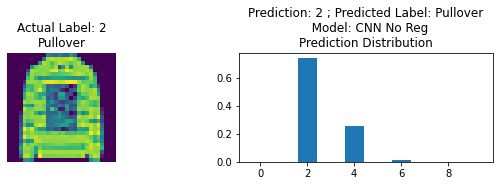

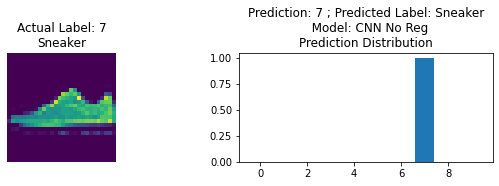

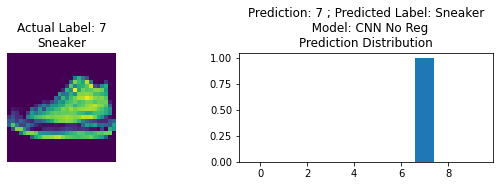

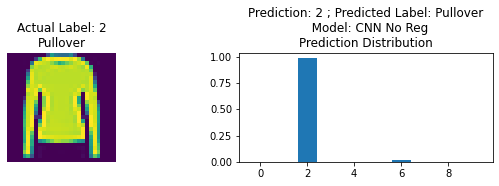

In [57]:
show_table_of_n_random_data_labels_and_pred_dist(CNN_no_reg_model, "CNN No Reg", 5)

In [61]:
# Define Regularization Callback(s)

reduceLRonPlateau_cnn_reg_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", 
                                                                          factor = 0.2, patience = 3, 
                                                                          verbose = 1)

In [62]:
#Define our get model function (CNN with L2 Regularization)

def get_CNN_reg_model(wd, rate, input_shape):
  model = Sequential ([
                       Conv2D (16, kernel_size = (3,3), padding = 'SAME', input_shape = input_shape, activation = 'relu', name = 'conv_1'),
                       MaxPooling2D(pool_size = (2,2), name = 'maxpool_1'),
                       BatchNormalization(),
                       Conv2D(16, kernel_size = (3,3), padding = 'SAME', activation = 'relu', kernel_regularizer = regularizers.l2(wd), name = 'conv_2'),
                       MaxPooling2D(pool_size = (2,2), name = 'maxpool_2'),
                       BatchNormalization(),
                       Conv2D(8, kernel_size = (3,3), padding = 'SAME', activation = 'relu', kernel_regularizer = regularizers.l2(wd), name = 'conv_3' ),
                       Flatten(name = 'flatten'),
                       Dense(32, activation = 'relu', name = 'dense_1'),
                       Dropout(rate),
                       Dense(32, activation = 'relu', name = 'dense_2'),
                       Dense(10, activation = 'softmax', name = 'softmax'),
                     ])
  return model

In [63]:
CNN_reg_model = get_CNN_reg_model(1e-5, 0.3, train_images_with_channel[0].shape)

In [64]:
CNN_reg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 14, 14, 16)        0         
                                                                 
 batch_normalization_2 (Batc  (None, 14, 14, 16)       64        
 hNormalization)                                                 
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 16)        2320      
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 7, 7, 16)          0         
                                                                 
 batch_normalization_3 (Batc  (None, 7, 7, 16)         64        
 hNormalization)                                      

In [65]:
CNN_reg_model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [66]:
CNN_reg_history = CNN_reg_model.fit(train_images_with_channel, train_labels, 
                  epochs = 30, validation_split = 0.15, batch_size = 64, 
                  callbacks = [reduceLRonPlateau_cnn_reg_callback],
                  verbose = True)

Epoch 1/30
797/797 [==============================] - 31s 38ms/step - loss: 0.6676 - accuracy: 0.7600 - val_loss: 0.3887 - val_accuracy: 0.8567 - lr: 0.0010
Epoch 2/30
797/797 [==============================] - 30s 38ms/step - loss: 0.4285 - accuracy: 0.8441 - val_loss: 0.3434 - val_accuracy: 0.8760 - lr: 0.0010
Epoch 3/30
797/797 [==============================] - 30s 38ms/step - loss: 0.3748 - accuracy: 0.8652 - val_loss: 0.2988 - val_accuracy: 0.8914 - lr: 0.0010
Epoch 4/30
797/797 [==============================] - 30s 38ms/step - loss: 0.3416 - accuracy: 0.8768 - val_loss: 0.2808 - val_accuracy: 0.8993 - lr: 0.0010
Epoch 5/30
797/797 [==============================] - 31s 39ms/step - loss: 0.3196 - accuracy: 0.8840 - val_loss: 0.2813 - val_accuracy: 0.8966 - lr: 0.0010
Epoch 6/30
797/797 [==============================] - 32s 40ms/step - loss: 0.3066 - accuracy: 0.8888 - val_loss: 0.2801 - val_accuracy: 0.8937 - lr: 0.0010
Epoch 7/30
797/797 [==============================] - 32s 

In [67]:
CNN_reg_model.evaluate(test_images_with_channel, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.2623 - accuracy: 0.9073


[0.26229044795036316, 0.9072999954223633]

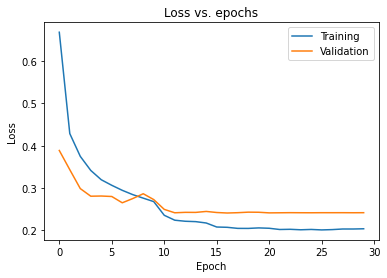

In [68]:
# Plot the training and validation loss

plt.plot(CNN_reg_history.history['loss'])
plt.plot(CNN_reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

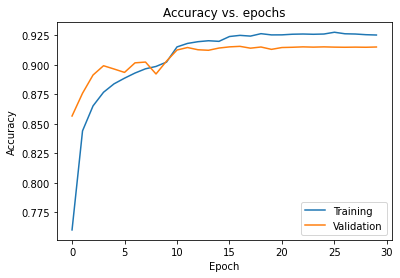

In [76]:
# Plot the training and validation Accuracy

plt.plot(CNN_reg_history.history['accuracy'])
plt.plot(CNN_reg_history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [73]:
prediction = CNN_reg_model.predict(test_images_with_channel[np.newaxis, 2749])
print(prediction)
prediction.shape

[[7.4470374e-15 1.0765231e-18 6.5583936e-21 2.6032837e-19 4.2932070e-17
  2.9022451e-12 1.1513870e-17 9.8123822e-16 1.0000000e+00 1.4758220e-12]]


(1, 10)

8 Bag


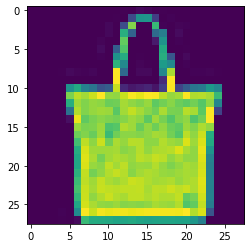

In [74]:
print(np.argmax(prediction), descriptive_labels[np.argmax(prediction)])
plt.imshow(test_images[2749])

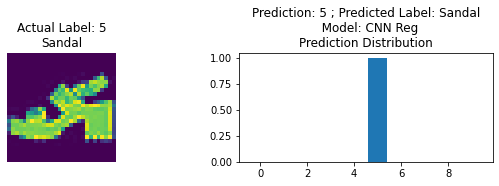

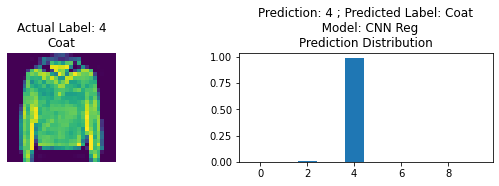

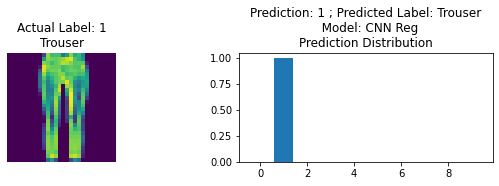

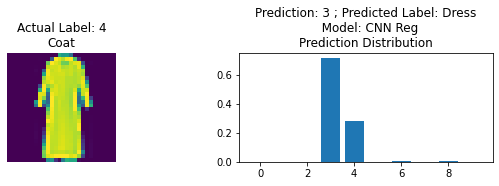

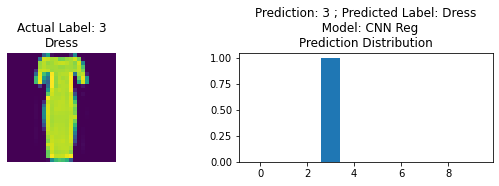

In [75]:
show_table_of_n_random_data_labels_and_pred_dist(CNN_reg_model, "CNN Reg", 5)